In [1]:
from __future__ import division, print_function
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydicom as dcm
from mriqa.ghosting import phantom_mask_2d, ghost_mask, slice_ghostiness
from skimage.filters import threshold_otsu
from skimage.measure import label, regionprops

In [2]:
scans= {}
scans['philips_se']    = dcm.read_file('../tests/test-data/philips-se.dcm')
scans['philips_tse']   = dcm.read_file('../tests/test-data/philips-tse.dcm')
scans['philips_epi']   = dcm.read_file('../tests/test-data/philips-epi.dcm')
scans['philips_epse']  = dcm.read_file('../tests/test-data/philips-epse.dcm')

scans['siemens_scout'] = dcm.read_file('../tests/test-data/siemens-scout.dcm')
scans['ge_scout']      = dcm.read_file('../tests/test-data/ge-scout.dcm')

Check mask based on otsu_threshold is basically OK. 

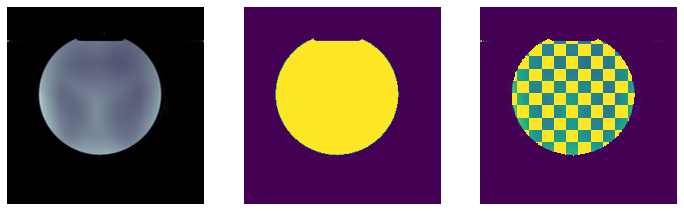

In [3]:
image = scans['philips_se'].pixel_array
mask = phantom_mask_2d(image)

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

axs[0].imshow(image, cmap='bone')
axs[0].grid(False)
axs[0].axis('off')
axs[0].axis('image')

axs[1].imshow(mask, cmap='viridis')
axs[1].grid(False)
axs[1].axis('off')
axs[1].axis('image')

nsquares = 16
ny, nx = image.shape
ny, nx = ny // nsquares, nx // nsquares
tile_shape = ny, nx
one_tile = np.hstack((
    np.vstack((np.ones(tile_shape) , np.zeros(tile_shape))),
    np.vstack((np.zeros(tile_shape) , np.ones(tile_shape))),
))
chessboard = np.tile(one_tile, (nsquares//2, nsquares//2)).astype(bool)

composite = chessboard * image + np.invert(chessboard) * mask * image.max()
axs[2].imshow(composite, cmap='viridis', interpolation='nearest')
axs[2].grid(False)
axs[2].axis('off')
axs[2].axis('image');

Try trimming away artefacts using a connected components analysis.

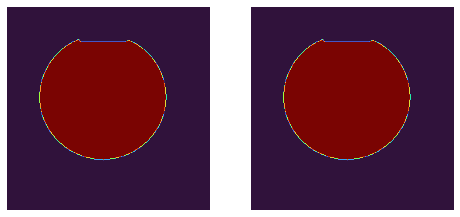

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

labels = label(mask)
axs[0].imshow(labels, cmap='turbo')
axs[0].grid(False)
axs[0].axis('off')

phantom_label = sorted(regionprops(labels), key=lambda x: x.area)[-1].label
phantom_mask = labels == phantom_label
axs[1].imshow(phantom_mask, cmap='turbo')
axs[1].grid(False)
axs[1].axis('off');

Yes, that's a bit better. We'll push that functionality back into the `phantom_mask_2d()` routine. DONE - so no difference now.

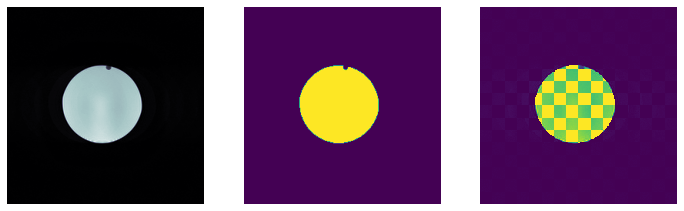

In [6]:
image = scans['philips_tse'].pixel_array
mask = phantom_mask_2d(image)

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

axs[0].imshow(image, cmap='bone')
axs[0].grid(False)
axs[0].axis('off')
axs[0].axis('image')

axs[1].imshow(mask, cmap='viridis')
axs[1].grid(False)
axs[1].axis('off')
axs[1].axis('image')

nsquares = 16
ny, nx = image.shape
ny, nx = ny // nsquares, nx // nsquares
tile_shape = ny, nx
one_tile = np.hstack((
    np.vstack((np.ones(tile_shape) , np.zeros(tile_shape))),
    np.vstack((np.zeros(tile_shape) , np.ones(tile_shape))),
))
chessboard = np.tile(one_tile, (nsquares//2, nsquares//2)).astype(bool)

composite = chessboard * image + np.invert(chessboard) * mask * image.max()
axs[2].imshow(composite, cmap='viridis', interpolation='nearest')
axs[2].grid(False)
axs[2].axis('off')
axs[2].axis('image');

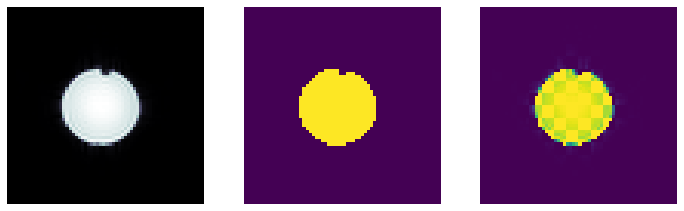

In [7]:
image = scans['philips_epi'].pixel_array[0]
mask = phantom_mask_2d(image)

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

axs[0].imshow(image, cmap='bone')
axs[0].grid(False)
axs[0].axis('off')
axs[0].axis('image')

axs[1].imshow(mask, cmap='viridis')
axs[1].grid(False)
axs[1].axis('off')
axs[1].axis('image')

nsquares = 16
ny, nx = image.shape
ny, nx = ny // nsquares, nx // nsquares
tile_shape = ny, nx
one_tile = np.hstack((
    np.vstack((np.ones(tile_shape) , np.zeros(tile_shape))),
    np.vstack((np.zeros(tile_shape) , np.ones(tile_shape))),
))
chessboard = np.tile(one_tile, (nsquares//2, nsquares//2)).astype(bool)

composite = chessboard * image + np.invert(chessboard) * mask * image.max()
axs[2].imshow(composite, cmap='viridis', interpolation='nearest')
axs[2].grid(False)
axs[2].axis('off')
axs[2].axis('image');

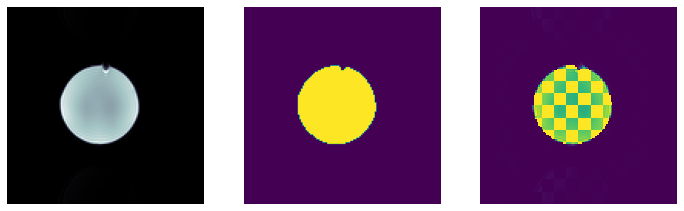

In [8]:
image = scans['philips_epse'].pixel_array
mask = phantom_mask_2d(image)

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

axs[0].imshow(image, cmap='bone')
axs[0].grid(False)
axs[0].axis('off')
axs[0].axis('image')

axs[1].imshow(mask, cmap='viridis')
axs[1].grid(False)
axs[1].axis('off')
axs[1].axis('image')

nsquares = 16
ny, nx = image.shape
ny, nx = ny // nsquares, nx // nsquares
tile_shape = ny, nx
one_tile = np.hstack((
    np.vstack((np.ones(tile_shape) , np.zeros(tile_shape))),
    np.vstack((np.zeros(tile_shape) , np.ones(tile_shape))),
))
chessboard = np.tile(one_tile, (nsquares//2, nsquares//2)).astype(bool)

composite = chessboard * image + np.invert(chessboard) * mask * image.max()
axs[2].imshow(composite, cmap='viridis', interpolation='nearest')
axs[2].grid(False)
axs[2].axis('off')
axs[2].axis('image');

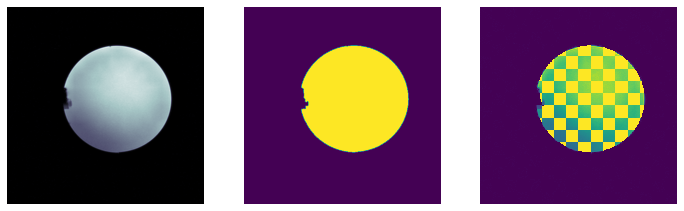

In [9]:
image = scans['siemens_scout'].pixel_array
mask = phantom_mask_2d(image)

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

axs[0].imshow(image, cmap='bone')
axs[0].grid(False)
axs[0].axis('off')
axs[0].axis('image')

axs[1].imshow(mask, cmap='viridis')
axs[1].grid(False)
axs[1].axis('off')
axs[1].axis('image')

nsquares = 16
ny, nx = image.shape
ny, nx = ny // nsquares, nx // nsquares
tile_shape = ny, nx
one_tile = np.hstack((
    np.vstack((np.ones(tile_shape) , np.zeros(tile_shape))),
    np.vstack((np.zeros(tile_shape) , np.ones(tile_shape))),
))
chessboard = np.tile(one_tile, (nsquares//2, nsquares//2)).astype(bool)

composite = chessboard * image + np.invert(chessboard) * mask * image.max()
axs[2].imshow(composite, cmap='viridis', interpolation='nearest')
axs[2].grid(False)
axs[2].axis('off')
axs[2].axis('image');

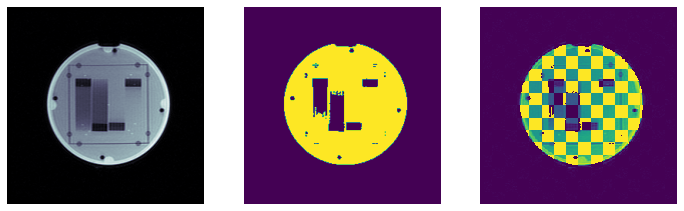

In [10]:
image = scans['ge_scout'].pixel_array
mask = phantom_mask_2d(image)

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

axs[0].imshow(image, cmap='bone')
axs[0].grid(False)
axs[0].axis('off')
axs[0].axis('image')

axs[1].imshow(mask, cmap='viridis')
axs[1].grid(False)
axs[1].axis('off')
axs[1].axis('image')

nsquares = 16
ny, nx = image.shape
ny, nx = ny // nsquares, nx // nsquares
tile_shape = ny, nx
one_tile = np.hstack((
    np.vstack((np.ones(tile_shape) , np.zeros(tile_shape))),
    np.vstack((np.zeros(tile_shape) , np.ones(tile_shape))),
))
chessboard = np.tile(one_tile, (nsquares//2, nsquares//2)).astype(bool)

composite = chessboard * image + np.invert(chessboard) * mask * image.max()
axs[2].imshow(composite, cmap='viridis', interpolation='nearest')
axs[2].grid(False)
axs[2].axis('off')
axs[2].axis('image');

The ghost mask is rolled by half the field of view (Nyquist).

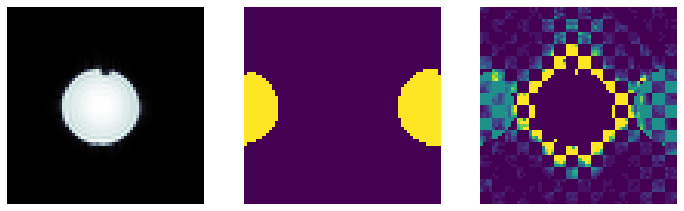

In [11]:
image = scans['philips_epi'].pixel_array[0]
mask = phantom_mask_2d(image)
ghost_m = ghost_mask(mask, 'row')

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

axs[0].imshow(image, cmap='bone')
axs[0].grid(False)
axs[0].axis('off')
axs[0].axis('image')

axs[1].imshow(ghost_m, cmap='viridis')
axs[1].grid(False)
axs[1].axis('off')
axs[1].axis('image')

nsquares = 16
ny, nx = image.shape
ny, nx = ny // nsquares, nx // nsquares
tile_shape = ny, nx
one_tile = np.hstack((
    np.vstack((np.ones(tile_shape) , np.zeros(tile_shape))),
    np.vstack((np.zeros(tile_shape) , np.ones(tile_shape))),
))
chessboard = np.tile(one_tile, (nsquares//2, nsquares//2)).astype(bool)
vmax = (ghost_m*image).max()
composite = (chessboard * image + np.logical_not(chessboard) * ghost_m * vmax/2) * np.logical_not(mask)
axs[2].imshow(composite, cmap='viridis', interpolation='nearest', vmin=0, vmax=vmax)
axs[2].grid(False)
axs[2].axis('off')
axs[2].axis('image');

before canny
expected_radius is None
before _best_hough_circle


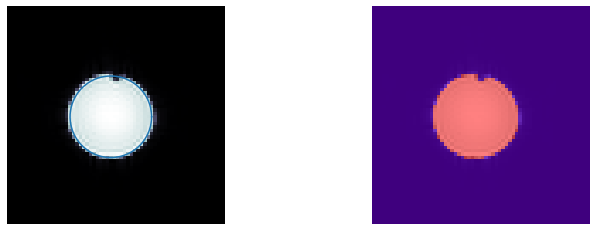

In [27]:
from mriqa.phantoms import find_phantom
image = scans['philips_epi'].pixel_array[0]
c_x, c_y, r = find_phantom(image)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].imshow(image, cmap='bone')
axs[0].grid(False)
axs[0].axis(False)
axs[0].axis('image')
angle = np.linspace(0 , 2 * np.pi , 150) 
x = c_x + r * np.cos(angle) 
y = c_y + r * np.sin(angle)
axs[0].plot(x, y)

axs[1].imshow(image, cmap='bone')
axs[1].grid(False)
axs[1].axis(False)
axs[1].axis('image')
axs[1].imshow(phantom_mask_2d(image), cmap='rainbow', alpha=0.5)


In [12]:
pmean, gmean, bright_gmean, snr = slice_ghostiness(scans['philips_epi'].pixel_array[0], pe_axis='row')
pd.DataFrame.from_items(zip(['pmean', 'gmean', 'bright_gmean', 'snr'], [[pmean], [gmean], [bright_gmean], [snr]]))

TypeError: object of type 'MaskedIterator' has no len()

In [ ]:
print('Normal Ghosts: %0.2f%%' % (gmean / pmean * 100))
print('Bright Ghosts: %0.2f%%' % (bright_gmean / pmean * 100))